In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopy
from mpl_toolkits.basemap import Basemap

In [2]:
dfeo = pd.read_csv('EO_opt_X_0408.csv', index_col=0)
dfss = pd.read_csv('SS_opt_X_0408.csv', index_col=0)
dfpct = pd.read_csv('PCT_opt_X_0408.csv', index_col=0)

----

In [3]:
def get_cty_name(ls):
    cty_ls = []
    
    for data in ls:
        cty_ls += list(data.loc[~(data==0).all(axis=1)].index)
    country = list(set(cty_ls))
    country = sorted(country)
    
    return country    

In [4]:
def normalize_df(df):
    columns = df.columns.tolist()
    for col in columns:
        col_sum = 1.0 / df[col].sum()
        df[col] *= col_sum
    return df

In [5]:
dfls = [dfeo, dfss, dfpct]
ls_country = get_cty_name(dfls)
ls_country = sorted(ls_country)

[Text(114.0, 0.5, '')]

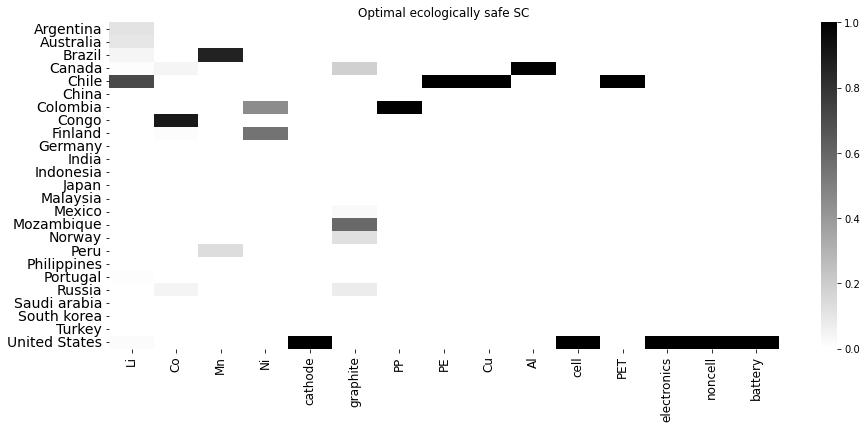

In [6]:
data = dfeo.loc[ls_country, :]
data_new = normalize_df(data)

plt.figure(figsize=(15, 6))
ax = sns.heatmap(data_new, annot=False, cmap='binary', vmin=0, cbar=True)
# ax = sns.heatmap(data_new, annot=False, cmap='YlGn', vmin=0, cbar=True)
plt.title('Optimal ecologically safe SC')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
ax.set(ylabel=None)
# plt.savefig("Ecological_0408.svg")

[Text(114.0, 0.5, '')]

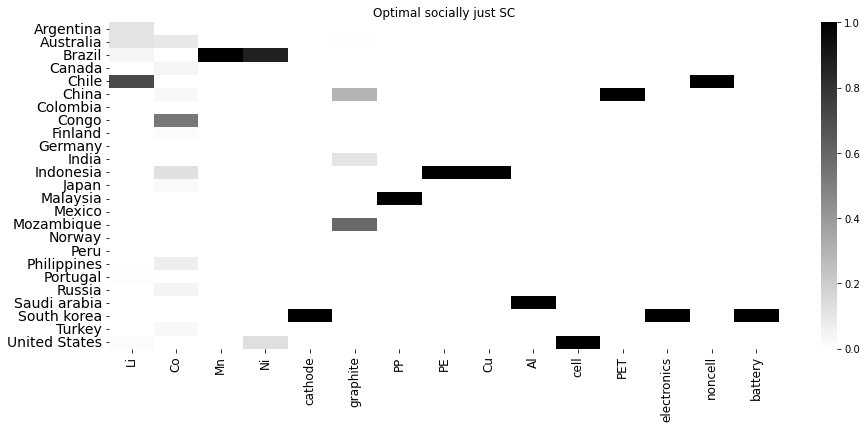

In [7]:
data = dfss.loc[ls_country, :]
data_new = normalize_df(data)

plt.figure(figsize=(15, 6))
ax = sns.heatmap(data_new, annot=False, cmap='binary', vmin=0, cbar=True)
# ax = sns.heatmap(data_new, annot=False, cmap='YlGn', vmin=0, cbar=True)
plt.title('Optimal socially just SC')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
ax.set(ylabel=None)
# plt.savefig("Social_0408.svg")

[Text(114.0, 0.5, '')]

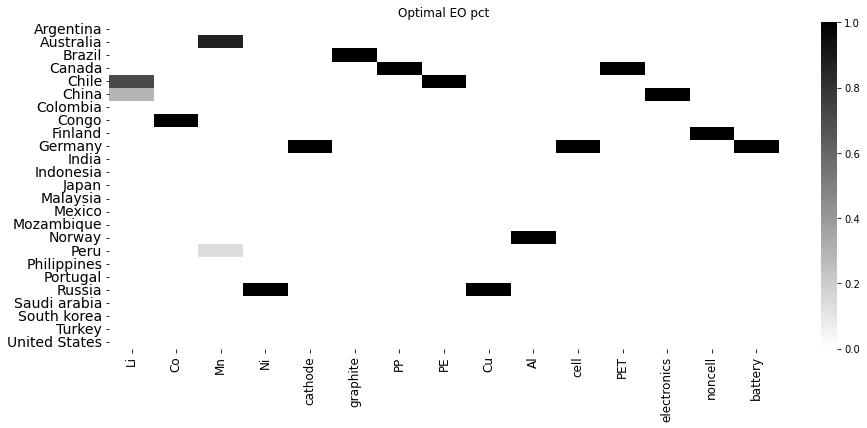

In [8]:
data = dfpct.loc[ls_country, :]
data_new = normalize_df(data)

plt.figure(figsize=(15, 6))
ax = sns.heatmap(data_new, annot=False, cmap='binary', vmin=0, cbar=True)
# ax = sns.heatmap(data_new, annot=False, cmap='YlGn', vmin=0, cbar=True)
plt.title('Optimal EO pct')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
ax.set(ylabel=None)
# plt.savefig("EOpct_0408.svg")

----

In [100]:
def great_circle(lat1, lon1, lat2, lon2, n_points=100):
    """
    Calculate points along a great circle arc between two points.
    """
    phi1, lambda1 = np.radians(lat1), np.radians(lon1)
    phi2, lambda2 = np.radians(lat2), np.radians(lon2)
    
    # Angular distance between points
    d = 2 * np.arcsin(np.sqrt(np.sin((phi2 - phi1) / 2)**2 +
                              np.cos(phi1) * np.cos(phi2) * np.sin((lambda2 - lambda1) / 2)**2))
    
    # Calculate points along the arc
    alphas = np.linspace(0, 1, n_points)
    points = []
    for alpha in alphas:
        A = np.sin((1 - alpha) * d) / np.sin(d)
        B = np.sin(alpha * d) / np.sin(d)
        x = A * np.cos(phi1) * np.cos(lambda1) + B * np.cos(phi2) * np.cos(lambda2)
        y = A * np.cos(phi1) * np.sin(lambda1) + B * np.cos(phi2) * np.sin(lambda2)
        z = A * np.sin(phi1) + B * np.sin(phi2)
        lat = np.degrees(np.arcsin(z))
        lon = np.degrees(np.arctan2(y, x))
        points.append((lat, lon))
    return points

In [101]:
def plot_arc(df, fig):
    num = df.shape[0]
    for i in range(num):
        start_lat = df.at[i, 'lat1']
        start_lon = df.at[i, 'lon1']
        end_lat = df.at[i, 'lat2']
        end_lon = df.at[i, 'lon2']
        
        lats = np.linspace(start_lat, end_lat, num_points)
        lons = np.linspace(start_lon, end_lon, num_points)
        
        points = great_circle(start_lat, start_lon, end_lat, end_lon)
        lats, lons = zip(*points)
        
        fig.add_trace(go.Scattergeo(
            lat=lats,
            lon=lons,
            mode='lines',
            line=dict(color='DarkSlateGrey', width=1)
        ))
        
        fig.add_trace(go.Scattergeo(
            lat=[start_lat, end_lat],
            lon=[start_lon, end_lon],
            mode='markers',
            marker=dict(
                line = dict(width=2, color="DarkSlateGrey"),
                size=5, 
                color='grey')
        ))


---

In [120]:
dfcode = pd.read_csv('country_name_code.csv')
code_tot = dfcode.loc[dfcode['country'].isin(ls_country)]['code'].tolist()

In [121]:
eo_country = list(dfeo.loc[~(dfeo==0).all(axis=1)].index)
ss_country = list(dfss.loc[~(dfss==0).all(axis=1)].index)
pct_country = list(dfpct.loc[~(dfpct==0).all(axis=1)].index)

eo_code = dfcode.loc[dfcode['country'].isin(eo_country)]['code'].tolist()
ss_code = dfcode.loc[dfcode['country'].isin(ss_country)]['code'].tolist()
pct_code = dfcode.loc[dfcode['country'].isin(pct_country)]['code'].tolist()

# print(len(eo_code))
# print(len(ss_code))
# print(len(pct_code))


In [122]:
uni_code = list(set(eo_code + ss_code + pct_code))
Cval = np.linspace(0, 10, len(uni_code))
dfuni = pd.DataFrame(Cval, uni_code, columns=['color_val'])

In [123]:
EOloc = pd.read_csv("EO_loc.csv")
SSloc = pd.read_csv("SS_loc.csv")
PCTloc = pd.read_csv("PCT_loc.csv")

In [154]:
# List of countries
countries = eo_code
num_countries = len(countries)
country_values = dfuni.loc[countries]['color_val'].tolist()


# Define the data for the world map
world = go.Figure()

# Create a choropleth trace for the world map
world.add_trace(go.Choropleth(
    locations=countries,
    z=country_values,
    locationmode="ISO-3",
    colorscale='RdYlBu',
    colorbar=dict(title="Colorbar Title"),
))

world.update_layout(
    title_text="Optimal supply chain with min EO%",
    showlegend = False,
    geo = dict(
        projection_type = "equirectangular",
        showland = True,
        showcoastlines=False,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    )
)

# # Update the layout
# world.update_layout(
#     title_text="Optimal supply chain with min net emission",
#     geo=dict(
#         showcoastlines=True,
#         projection_type="equirectangular"
#     )
# )

plot_arc(EOloc, world)

# Show the plot
world.show()

In [155]:
world.write_image("map_EO_0408.svg")

In [152]:
# List of countries
countries = ss_code
num_countries = len(countries)
country_values = dfuni.loc[countries]['color_val'].tolist()


# Define the data for the world map
world = go.Figure()

# Create a choropleth trace for the world map
world.add_trace(go.Choropleth(
    locations=countries,
    z=country_values,
    locationmode="ISO-3",
    colorscale='RdYlBu',
    colorbar=dict(title="Colorbar Title"),
))

world.update_layout(
    title_text="Optimal supply chain with min EO%",
    showlegend = False,
    geo = dict(
        projection_type = "equirectangular",
        showland = True,
        showcoastlines=False,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    )
)

# # Update the layout
# world.update_layout(
#     title_text="Optimal supply chain with min social shortfall",
#     geo=dict(
#         showcoastlines=True,
#         projection_type="equirectangular"
#     )
# )

plot_arc(SSloc, world)

# Show the plot
world.show()

In [153]:
world.write_image("map_SS_0408.svg")

In [150]:
# List of countries
countries = pct_code
num_countries = len(countries)
country_values = dfuni.loc[countries]['color_val'].tolist()


# Define the data for the world map
world = go.Figure()

# Create a choropleth trace for the world map
world.add_trace(go.Choropleth(
    locations=countries,
    z=country_values,
    locationmode="ISO-3",
    colorscale='RdYlBu',
    colorbar=dict(title="Colorbar Title"),
))

world.update_layout(
    title_text="Optimal supply chain with min EO%",
    showlegend = False,
    geo = dict(
        projection_type = "equirectangular",
        showland = True,
        showcoastlines=False,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    )
)


# # Update the layout
# world.update_layout(
#     title_text="Optimal supply chain with min EO%",
#     geo=dict(
#         showcoastlines=True,
#         projection_type="equirectangular"
#     )
# )

plot_arc(PCTloc, world)

# Show the plot
world.show()

In [151]:
world.write_image("map_PCT_0408.svg")

In [56]:
# up_cathode = dfeo.loc[:, ['Li', 'Co', 'Mn', 'Ni']]
# up_cell = dfeo.loc[:, ['cathode', 'graphite', 'PP', 'PE', 'Cu', 'Al']]
# up_noncell = dfeo.loc[:, ['PET', 'electronics']]
# up_battery = dfeo.loc[:, ['cell', 'noncell']]

---

In [134]:
"Metal mining"
"Cathode production"
"Cell production"
"Noncell production"
"Battery production"

'Mieral'

In [149]:
# List of countries
countries = pct_code
num_countries = len(countries)
country_values = dfuni.loc[countries]['color_val'].tolist()


# Define the data for the world map
world = go.Figure()

# Create a choropleth trace for the world map
world.add_trace(go.Choropleth(
    locations=countries,
    z=country_values,
    locationmode="ISO-3",
    colorscale='RdYlBu',
    colorbar=dict(title="Colorbar Title"),
))


# world.update_geos(
#     visible=True, resolution=50,
#     showcountries=True, countrycolor="grey"
# )

# world.update_traces(marker_line_width=0.1, selector=dict(type='choropleth'))

world.update_layout(
    title_text="Optimal supply chain with min EO%",
    showlegend = False,
    geo = dict(
        projection_type = "equirectangular",
        showland = True,
        showcoastlines=False,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)


# # Update the layout
# world.update_layout(
#     title_text="Optimal supply chain with min EO%",
#     geo=dict(
#         showcoastlines=True,
#         projection_type="equirectangular"
#     )
# )

plot_arc(PCTloc, world)

# Show the plot
world.show()